In [1]:
import sys
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import json

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')

if src_dir not in sys.path:
    sys.path.append(src_dir)

from enums import DataSplit
from utils import show_images_with_masks
from tumor_dataset import TumorSemanticSegmentationDataset

In [2]:
DATASETS_ROOT = os.path.join(current_dir, '..', 'datasets')
BATCH_SIZE = 16

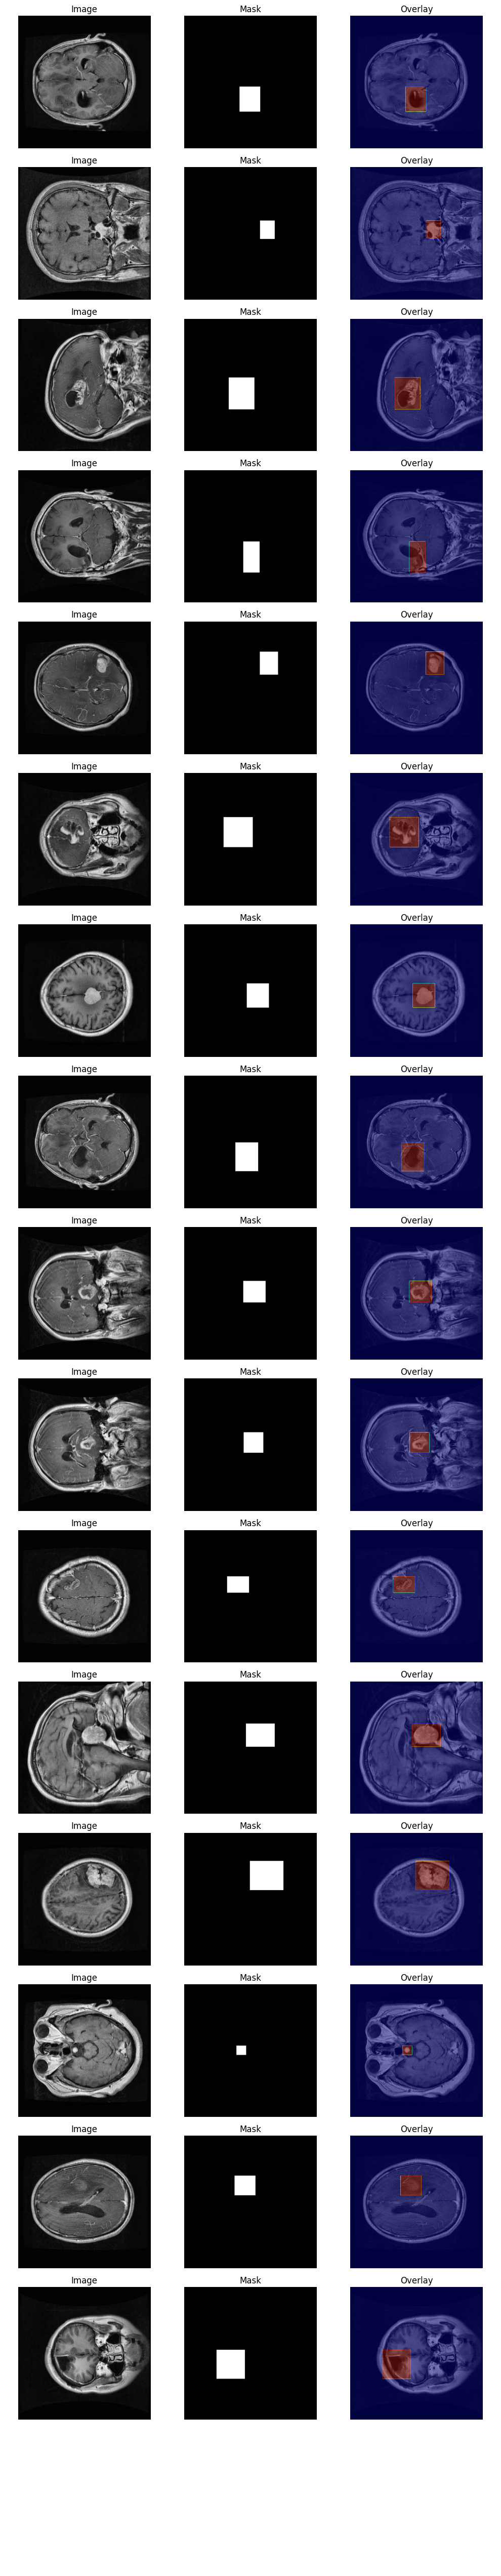

In [3]:
dataset = TumorSemanticSegmentationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=transforms.ToTensor())
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
images, masks = next(iter(data_loader)) # get a batch of data
show_images_with_masks(images, masks, nmax=BATCH_SIZE)

### Testing Different Transformations Methods